In [2]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/3e/6f/b3d59fac3869a7685e68aecdd35c336800bce8c8d3b45687bb82cf9a2848/pycaret-3.3.2-py3-none-any.whl.metadata
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import setup, models, compare_models, predict_model

In [53]:
data = pd.read_csv("data/glass.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


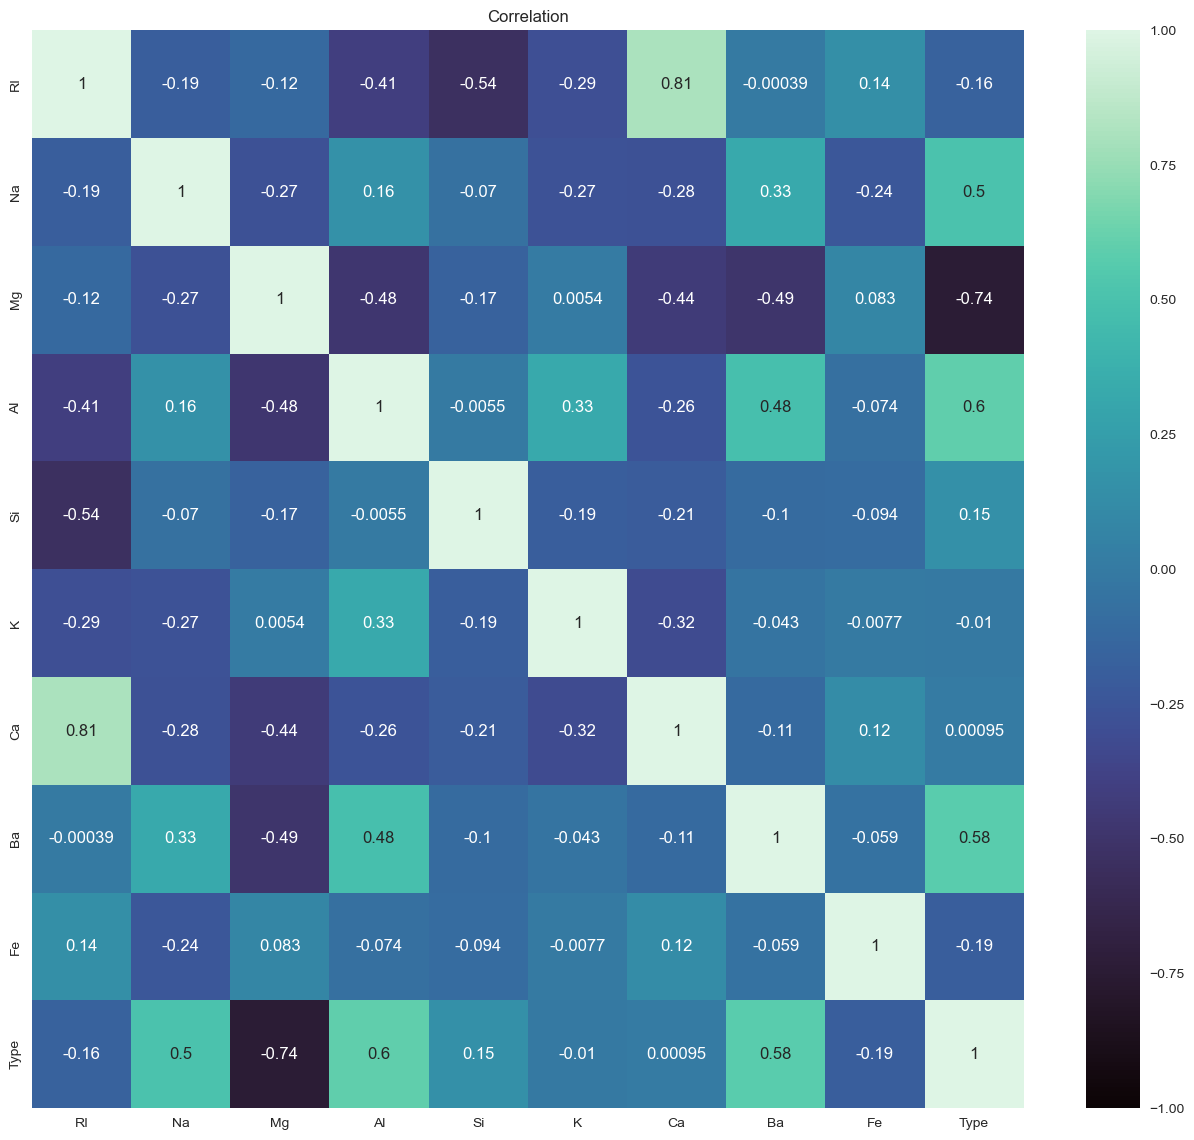

In [6]:
# Begin with a quick visualization

corr = data.corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr,annot=True,vmin=-1.0,vmax=1.0,cmap="mako")
plt.title("Correlation")
plt.show()

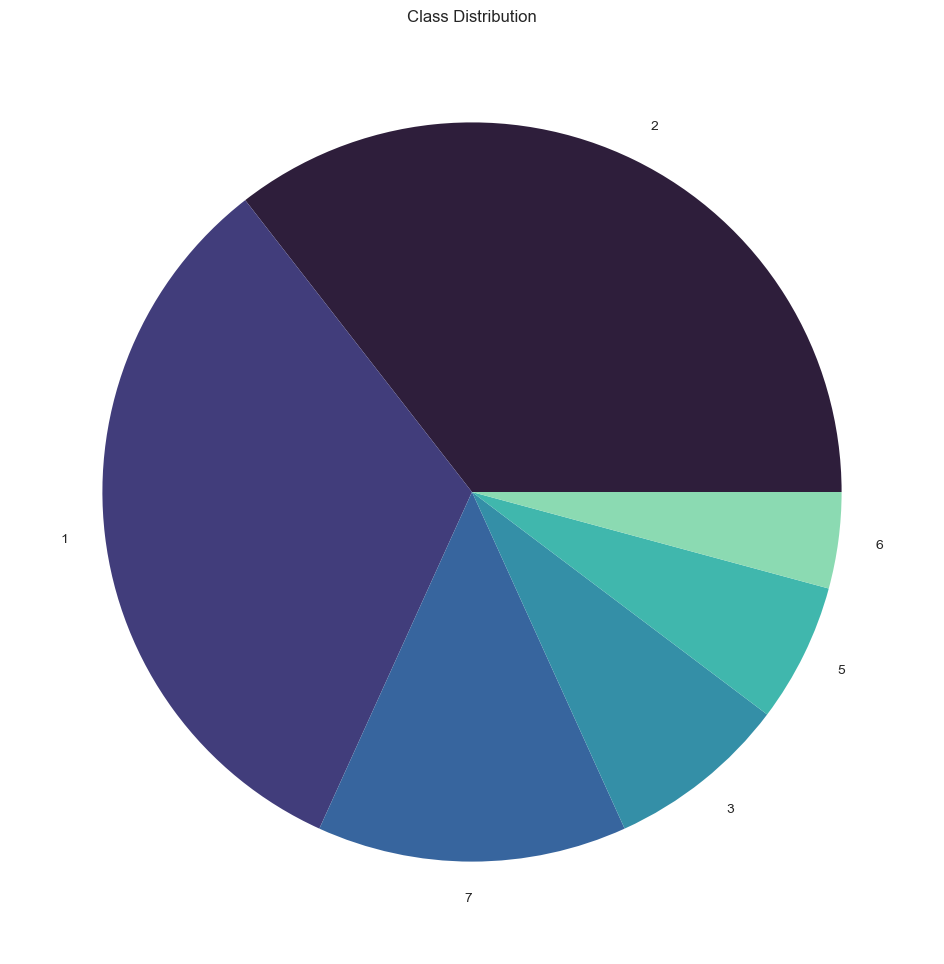

In [7]:
plt.figure(figsize=(12,12))
plt.pie(data["Type"].value_counts(), labels=data["Type"].value_counts().index,colors=sns.color_palette("mako"))
plt.title("Class Distribution")
plt.show()

In [54]:
# Next, model comparison and evaluation

setup(
    data=data,
    target="Type",
    normalize=True,
    train_size=0.7
)

,Description,Value
0,Session id,2350
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [55]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [56]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7581,0.4756,0.7581,0.7279,0.7343,0.6633,0.6739,0.0730
et,Extra Trees Classifier,0.7386,0.4695,0.7386,0.7010,0.7044,0.6366,0.6510,0.0680
lightgbm,Light Gradient Boosting Machine,0.7314,0.4634,0.7314,0.6836,0.6989,0.6218,0.6334,0.5750
gbc,Gradient Boosting Classifier,0.6848,0.0000,0.6848,0.6461,0.6553,0.5604,0.5702,0.1920
dt,Decision Tree Classifier,0.6710,0.3997,0.6710,0.6405,0.6451,0.5478,0.5568,0.0190
knn,K Neighbors Classifier,0.6443,0.4162,0.6443,0.5884,0.5952,0.4923,0.5168,0.6500
lda,Linear Discriminant Analysis,0.6243,0.0000,0.6243,0.5971,0.5986,0.4763,0.4873,0.0150
lr,Logistic Regression,0.6162,0.0000,0.6162,0.5767,0.5774,0.4595,0.4799,1.2720
ridge,Ridge Classifier,0.5967,0.0000,0.5967,0.5319,0.5406,0.4265,0.4458,0.0170
qda,Quadratic Discriminant Analysis,0.4957,0.0000,0.4957,0.4162,0.4323,0.2822,0.3052,0.0150


In [57]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7385,0.9341,0.7385,0.7612,0.7355,0.6358,0.6427


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
116,1.51829,13.24,3.90,1.41,72.330002,0.55,8.31,0.00,0.10,2,2,0.81
131,1.52614,13.70,0.00,1.36,71.239998,0.19,13.44,0.00,0.10,2,2,0.83
177,1.51937,13.79,2.41,1.19,72.760002,0.00,9.77,0.00,0.00,6,2,0.34
144,1.51660,12.99,3.18,1.23,72.970001,0.58,8.81,0.00,0.24,2,2,0.47
155,1.51646,13.04,3.40,1.26,73.010002,0.52,8.58,0.00,0.00,3,2,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
167,1.51969,12.64,0.00,1.65,73.750000,0.38,11.53,0.00,0.00,5,5,0.62
56,1.51215,12.99,3.47,1.12,72.980003,0.62,8.35,0.00,0.31,1,1,0.51
86,1.51569,13.24,3.49,1.47,73.250000,0.38,8.03,0.00,0.00,2,2,0.70
210,1.51685,14.92,0.00,1.99,73.059998,0.00,8.40,1.59,0.00,7,7,1.00


In [16]:
# Next, refine XGBoost to see if we can make it better

pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/99.8 MB 27.5 MB/s eta 0:00:04
   ---------------------------------------- 0.8/99.8 MB 9.6 MB/s eta 0:00:11
   ---------------------------------------- 1.2/99.8 MB 10.8 MB/s eta 0:00:10
    --------------------------------------- 1.3/99.8 MB 7.7 MB/s eta 0:00:13
    --------------------------------------- 1.8/99.8 MB 8.8 MB/s eta 0:00:12
    --------------------------------------- 2.2/99.8 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 2.6/99.8 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.1/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 3.5/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------

In [58]:
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [59]:
X = data.drop(["Type"], axis=1).values 
y = data["Type"].values

In [60]:
# The model won't fit, because the y values are not as expected. Change them to align with expected values.

# Current y values
#y = np.array([1, 2, 3, 5, 6, 7])  

# Create a mapping from old labels to new labels
unique_classes = np.unique(y)
class_mapping = {old_class: new_class for new_class, old_class in enumerate(unique_classes)}

# Apply the mapping
y_mapped = np.vectorize(class_mapping.get)(y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, random_state=42, test_size=0.3)

In [62]:
model = RandomForestClassifier()

In [63]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)